In [3]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from tqdm import tqdm


In [14]:
iterations=100_000
#generates all permmutations
from itertools import product
def gen_profile(n, s):
    permutations = list(product(np.arange(s + 1), repeat=n))
    profile = [i for i in permutations if np.sum(i) == s]
    return np.array(profile)
profile = gen_profile(3,5)



regret_current_a=np.zeros(len(profile))
regret_current_b=np.zeros(len(profile))
        
freq_seq_a=np.zeros(len(profile))
freq_seq_b=np.zeros(len(profile))

moves_seq_a=[]
moves_seq_b=[]




current_move_a=random.choice(range(len(profile)))
current_move_b=random.choice(range(len(profile)))

all_regret_a=[]
all_regret_b=[]

cr_a=[]
cr_b=[]

distrib_a=[]
distrib_b=[]

unif=np.ones(21)/21
distrib_a_avg=[]
distrib_b_avg=[]
distrib_a_avg.append(unif)
distrib_b_avg.append(unif)

diff = np.zeros((2, len(profile)))
for time in tqdm(range(iterations)):
    
    all_regret_a.append(regret_current_a[current_move_a])
    all_regret_b.append(regret_current_b[current_move_b])
    
    freq_seq_a[current_move_a]+=1
    freq_seq_b[current_move_b]+=1
    
    moves_seq_a.append(current_move_a)
    moves_seq_b.append(current_move_b)
    
        
    current_move_a=get_action(regret_current_a,current_move_a,0)
    current_move_b=get_action(regret_current_b,current_move_b,1)
    
    regret_current_a=update_regret(diff,current_move_a,current_move_b,time,0)
    regret_current_b=update_regret(diff,current_move_b,current_move_a,time,1)
    
    cr_a.append(regret_current_a)
    cr_b.append(regret_current_b)
    


100%|██████████| 100000/100000 [00:51<00:00, 1925.72it/s]


In [5]:
#cra = np.array(all_regret_a)
#plt.plot(range(len(cra.T[moves_seq_a[-1]])),cra.T[moves_seq_a[-1]])
cumulative_regret_b=[all_regret_b[0]]
for i in range(1,len(all_regret_b)):
    cumulative_regret_b.append(cumulative_regret_b[-1] + all_regret_b[i])
average_b=[cumulative_regret_b[i]/(i+1) for i in range(iterations)]

plt.plot(range(iterations),cr_a)
plt.title('Regret of player A over 100000 iterations')
all_regret_b[-1]



IndexError: list index out of range

In [6]:


def get_action(regret,move,player):
    pos_regret=[x if x >0 else 0 for x in regret]
    if(sum(pos_regret)==0):
        
        if player==0:
            distrib_a.append(np.ones(len(profile))/len(profile))
            distrib_a_avg.append(distrib_a_avg[-1]+distrib_a[-1])
        else:
            distrib_b.append(np.ones(len(profile))/len(profile)) 
            distrib_b_avg.append(distrib_b_avg[-1]+distrib_b[-1])
                             
        return random.choice(range(len(profile)))
    
    distribution=probability_current(pos_regret,move)
    c_distribution=np.cumsum(distribution)
    

        
    r=random.uniform(0,1)

    if(player==0):
        distrib_a.append(distribution)
        distrib_a_avg.append(distrib_a_avg[-1]+distrib_a[-1])
    else:
        distrib_b.append(distribution)
        distrib_b_avg.append(distrib_b_avg[-1]+distrib_b[-1])
    
    if r>=0 and r<c_distribution[0]:
            return 0
    for i in range(len(c_distribution)-1):
        if r>=c_distribution[i] and r<c_distribution[i+1]:
            return i+1
        


In [7]:
C=40
def util(strat_me,strat_opp):
    return sum(np.sign(profile[strat_me]-profile[strat_opp]))



def probability_current(regret,strat_index):
    probability=np.zeros(len(profile))
    for i in range(len(profile)):
        if i != strat_index:
            probability[i]=regret[i]/C
    probability[strat_index]=1-sum(probability)
    return probability


In [11]:
def update_regret(diff, strat, strat_opp,t, player):
    i = t
    if player==0:

        current_util=np.ones(len(profile))*util(moves_seq_a[i],moves_seq_b[i])
        swap_util=[util(what_if,moves_seq_b[i]) for what_if in range(len(profile))]
        swap_util=np.array(swap_util)
        diff[0]+= swap_util-current_util 
    else:
        current_util=np.ones(len(profile))*util(moves_seq_b[i],moves_seq_a[i])
        swap_util=[util(what_if,moves_seq_a[i]) for what_if in range(len(profile))]
        swap_util=np.array(swap_util)
        diff[1] += swap_util-current_util 


                
    return diff[player]/(t+1)
    
    

In [6]:
print(sum(cummulative_regret_a))

NameError: name 'cummulative_regret_a' is not defined

0.27077 0.69222
[0.         0.         0.11111111 0.11111111 0.         0.
 0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.         0.11111111 0.11111111 0.11111111 0.11111111
 0.         0.         0.        ]


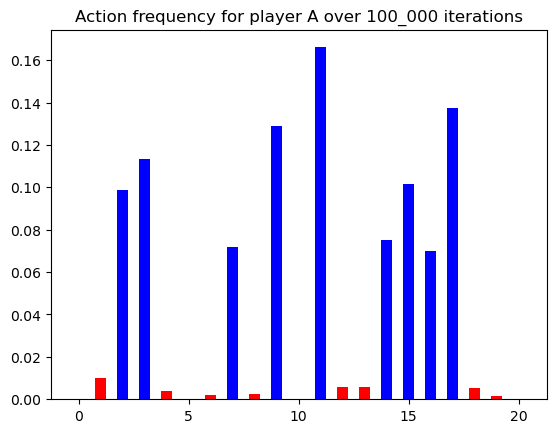

In [15]:

CE=[[0,3,2],[0,2,3],[1,1,3],[2,0,3],[1,3,1],[3,2,0],[2,3,0],[3,0,2],[3,1,1]]
plt.bar(range(len(profile)), freq_seq_a/iterations, color = ['b' if (list(x) in CE) else 'r' for x in profile], 
        width = 0.5)
plt.title('Action frequency for player A over 100_000 iterations')
print((freq_seq_a[7]+freq_seq_a[9]+freq_seq_a[16])/sum(freq_seq_a),(freq_seq_a[2]+freq_seq_a[3]+freq_seq_a[11]+freq_seq_a[14]+freq_seq_a[15]+freq_seq_a[17])/sum(freq_seq_a))


NE=[1 if (list(x) in CE) else 0 for x in profile]
NE=np.array(NE)
NE=NE/sum(NE)
print(NE)

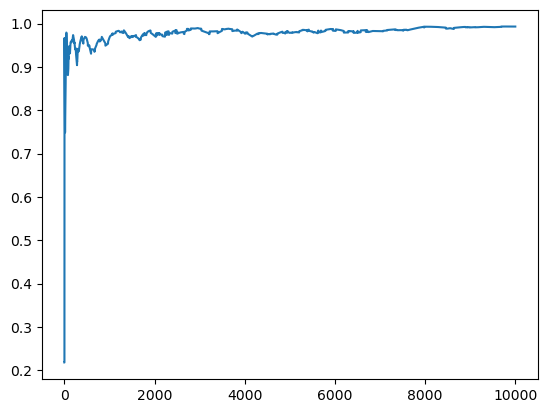

In [128]:
import math as math
distrib_a_avg=np.array(distrib_a_avg)
x=distrib_a_avg-NE



#for i in range(3,len(all_regret_b)):
#    speed1=(x[i]-x[i-1])/(x[i-1]-x[i-2])
#    speed2=(x[i-1]-x[i-2])/(x[i-2]-x[i-3])
#    speed.append(math.log(abs(speed1))/math.log(abs(speed2)))
plt.plot([np.linalg.norm(np.abs(x[i] - x[i -1])) for i in range(1,len(x))])


0.0
0.0803068093471972


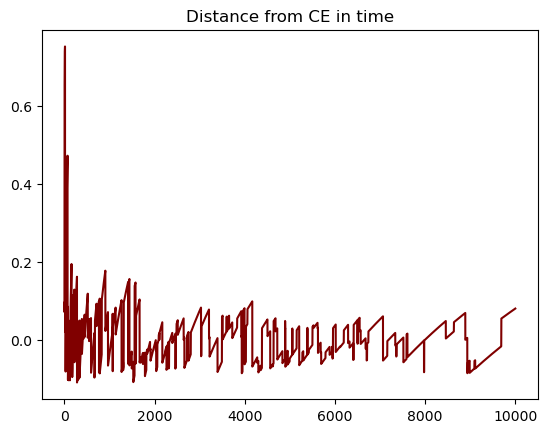

In [133]:
m=np.array(moves_seq_a)

print(NE[1])
#print(np.shape(da[i]-NE))
near=np.array([np.dot(np.array([1 if j==moves_seq_a[i] else 0 for j in range(21)]),(distrib_a_avg[i]/i-NE)) for i in range(1,iterations)])


strategy_change=np.array([(distrib_a_avg[i]/i-NE) for i in range(1,iterations)])
plt.plot(near,color='maroon')
plt.title('Distance from CE in time')
print(near[-1])

s_c=np.array([np.linalg.norm(strategy_change[i]-strategy_change[i-1]) for i in range(1,iterations-1)])

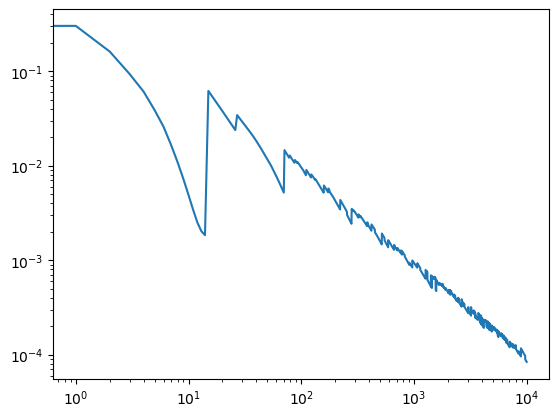

In [136]:
plt.loglog(s_c)


#distrib_a_avg=np.array([np.average(np.array(distrib_a[0:i]),axis=0) for i in range(1,iterations)])

#plt.bar(range(len(profile)), distrib_a_avg, color = ['b' if (list(x) in CE) else 'r' for x in profile], 
       # width = 0.5)


(9999, 21)
(9999, 21)


Text(0.5, 1.0, 'strategy change linear')

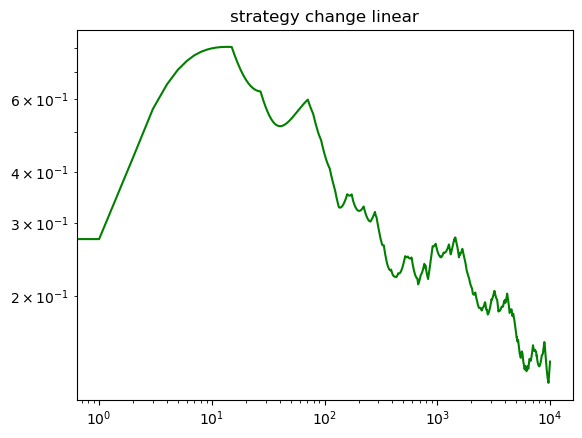

In [127]:
print(np.shape(strategy_change))

plt.loglog([np.linalg.norm(strategy_change[i])for i in range(9999)],color='g')

print(np.shape(np.array(strategy_change)))
plt.title('strategy change linear')

In [119]:
import seaborn
da=np.array(distrib_a)
db=np.array(distrib_b)

dA=np.sum(distrib_a,axis=0)
dB=np.sum(distrib_b,axis=0)

print(np.sum(da[0:2],axis=0))

#epsilon=[(dcA[i]-dcA[i-1]) for i in range(1,len(da))]



#plt.yscale("log")
#plt.loglog([np.max(epsilon[i]) for i in range(0,len(epsilon))])
#plt.title('Epsilon convergence')


[0.0952381 0.0952381 0.0952381 0.0952381 0.0952381 0.0952381 0.0952381
 0.0952381 0.0952381 0.0952381 0.0952381 0.0952381 0.0952381 0.0952381
 0.0952381 0.0952381 0.0952381 0.0952381 0.0952381 0.0952381 0.0952381]


In [ ]:
stacked_data = np.cumsum(data, axis=1)

# Create a stack plot with the 'viridis' colormap
plt.figure(figsize=(10, 6))
plt.stackplot(range(1, 101), stacked_data.T, labels=[f'Region {i+1}' for i in range(21)], cmap='viridis', alpha=0.7)
plt.title('Stack Plot of 21 Regions with Viridis Colormap')
plt.xlabel('Time')
plt.ylabel('Cumulative Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


(10000, 21)
0.10931093109310931


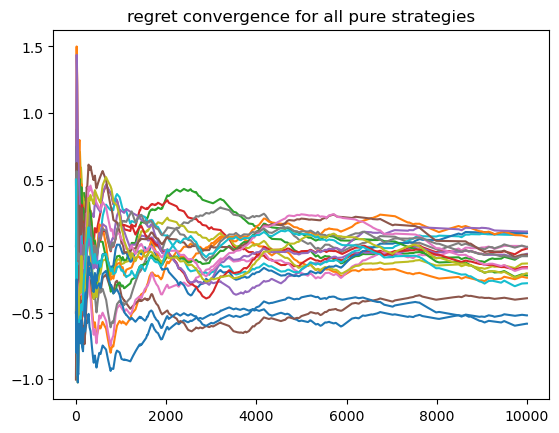

In [148]:
x=np.array(cr_a)
print(np.shape(x))
y=[(all_regret_a[i]+all_regret_a[i+1]+all_regret_a[i+2]+all_regret_a[i+3]+all_regret_a[i+4])/5 for i in range(0,len(x)-5)]

plt.plot([x[i] for i in range(1,len(x)) ])
plt.title('regret convergence for all pure strategies')
print(all_regret_a[-1])

In [1]:
data =x

data = np.array(data)


# Exclude zero values from the data
non_zero_indices = data > 0
data = data[non_zero_indices]

# Generate x values based on the number of non-zero data points
x = np.linspace(1, len(data), len(data))

# Take the logarithm of the data
log_data = np.log(data)

# Create a linear regression model
slope, intercept = np.polyfit(x, log_data, 1)

# Generate the best-fitting line
best_fit_line = slope * x + intercept

# Create a log-linear plot
plt.semilogy(x, data, label='Original Data')
plt.semilogy(x, np.exp(best_fit_line), label=f'Best Fit Line (Gradient: {slope:.4f})', linestyle='--')

# Customize the plot if needed
plt.title('Log-Linear Plot with Best Fit Line (Excluding log(0))')
plt.xlabel('X-axis')
plt.ylabel('Y-axis (log scale)')
plt.legend()

# Show the plot
plt.show()
print(slope)

NameError: name 'x' is not defined

## average_d_a=np.sum(distrib_a,axis=0)/iterations
average_d_b=np.sum(distrib_b,axis=0)/iterations

dA=np.array(average_d_a)
dA=dA.reshape(-1, 1)
dB=np.array(average_d_b)
dB=dB.reshape(1,-1)
mat = np.matmul(dA,dB)
print(np.shape(dA))



plt.imshow(mat, interpolation='nearest',origin='lower')
plt.colorbar()

Gradient of the best-fit line: 0.014345601367234546


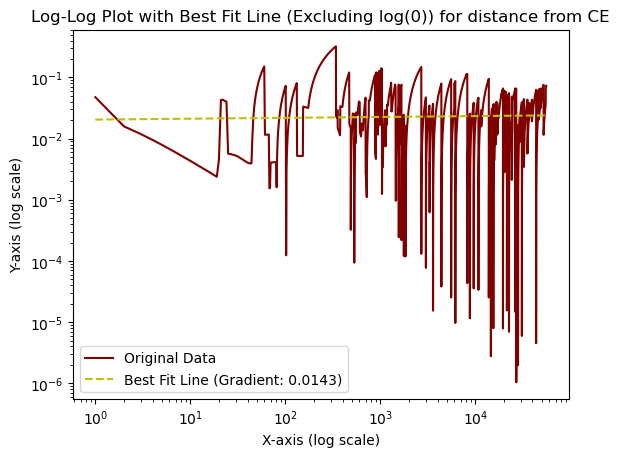

In [103]:
# Assuming 'data' is your array of data points
#data=all_regret_a
#data = np.array(data)

data=near
data = np.array(data)
# Exclude zero values from the data
non_zero_indices = data > 0
data = data[non_zero_indices]

# Generate x values based on the number of non-zero data points
x = np.linspace(1, len(data), len(data))

# Take the logarithm of both x and y data
log_x = np.log(x)
log_data = np.log(data)

# Create a linear regression model in log-log space
slope, intercept = np.polyfit(log_x, log_data, 1)

# Generate the best-fitting line
best_fit_line = slope * log_x + intercept

# Display the gradient
print(f'Gradient of the best-fit line: {slope}')

# Create a log-log plot
plt.loglog(x, data, label='Original Data',color='maroon')
plt.loglog(np.exp(log_x), np.exp(best_fit_line), label=f'Best Fit Line (Gradient: {slope:.4f})', linestyle='--',color='y')

# Customize the plot if needed
plt.title('Log-Log Plot with Best Fit Line (Excluding log(0)) for distance from CE')
plt.xlabel('X-axis (log scale)')
plt.ylabel('Y-axis (log scale)')
plt.legend()

# Show the plot
plt.show()

In [ ]:
print(np.max(epsilon[10000]))

(10000, 21)


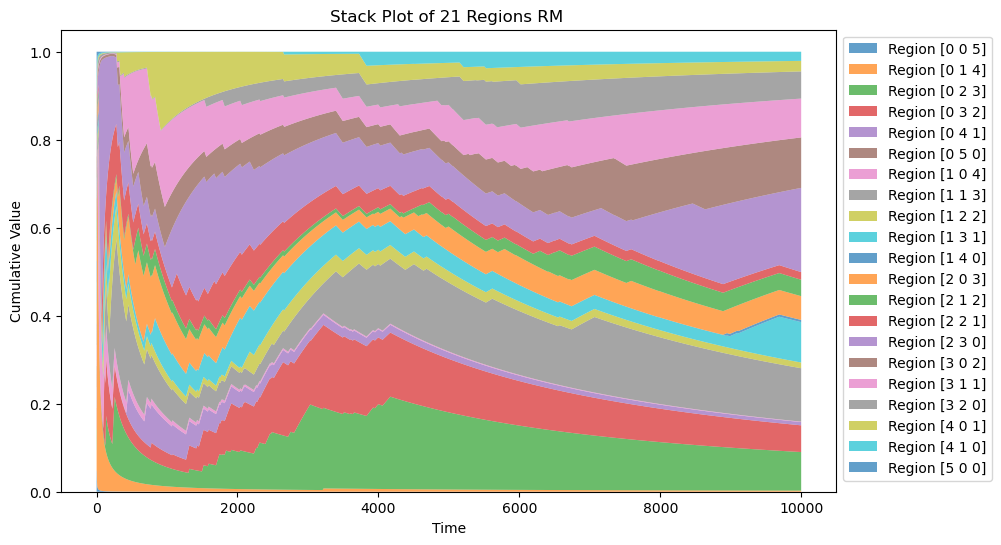

In [181]:
c_final=np.array([distrib_a_avg[i]/(i+1) for i in range (0,iterations)])
print(np.shape(c_final))

data=c_final
stacked_data =data #np.cumsum(data, axis=1)

# Create a stack plot with the 'viridis' colormap
plt.figure(figsize=(10, 6))
plt.stackplot(range(1, iterations+1), stacked_data.T, labels=[f'Region {i}' for i in ALL], cmap='viridis', alpha=0.7)
plt.title('Stack Plot of 21 Regions RM ')
plt.xlabel('Time')
plt.ylabel('Cumulative Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [179]:
print(profile)
ALL=[i for i in profile]
print(ALL)

[[0 0 5]
 [0 1 4]
 [0 2 3]
 [0 3 2]
 [0 4 1]
 [0 5 0]
 [1 0 4]
 [1 1 3]
 [1 2 2]
 [1 3 1]
 [1 4 0]
 [2 0 3]
 [2 1 2]
 [2 2 1]
 [2 3 0]
 [3 0 2]
 [3 1 1]
 [3 2 0]
 [4 0 1]
 [4 1 0]
 [5 0 0]]
[array([0, 0, 5]), array([0, 1, 4]), array([0, 2, 3]), array([0, 3, 2]), array([0, 4, 1]), array([0, 5, 0]), array([1, 0, 4]), array([1, 1, 3]), array([1, 2, 2]), array([1, 3, 1]), array([1, 4, 0]), array([2, 0, 3]), array([2, 1, 2]), array([2, 2, 1]), array([2, 3, 0]), array([3, 0, 2]), array([3, 1, 1]), array([3, 2, 0]), array([4, 0, 1]), array([4, 1, 0]), array([5, 0, 0])]
